# Demonstration of the LSD class

In this tutorial, we highlight the basic functionality of the LSD class. This includes loading in LSD profiles, making quick graphs, slicing the data, and slightly more advanced capabilities such as normalizing the profiles and changing the LSD weights (wpol and wint).

The class functions to calculate Bz is demonstrated in the CalculateBz_Tutorial.

## 0. Importing Necessary Packages

In [1]:
import specpolFlow as pol
import matplotlib.pyplot as plt
import numpy as np

## 1. Loading and displaying LSD profiles
Below, we use the built-in `read_lsd` function to read the LSD data in as an object. Inside the LSD profile, the variables are arrays of values which include:

* vel - the velocity grid 
* specI & specSigI - the Stokes I profile and its uncertainties
* specV & specSigV - the Stokes V polarization profile and its uncertainties
* specN1 & specSigN1 - the Null1 profile and its uncertainties
* specN2 & specSigN2 - the (optional) Null2 profile and its uncertainties 
* header - the header of the file that was read to create the lsd_prof

One can plot the results with `plot` directly with SpecpolFlow. This fucntion contains an optional argument `figsize` that determines the size of the image created; the defaul is (10,10).

In [2]:
# iolsd.read_lsd is used to read lsd data into an object
lsd1 = pol.read_lsd('CalculateBz_tutorialfiles/SampleLSD.s')

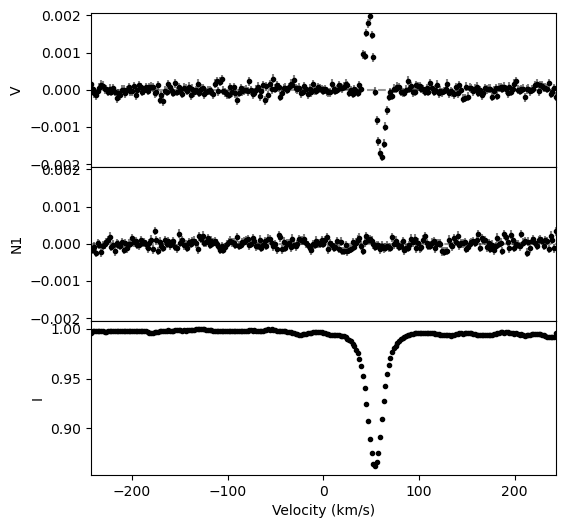

In [5]:
# setting the figsize argument in iolsd.plot 
fig, ax = lsd1.plot(figsize=(6,6))

## 2. Slicing LSD profiles
You are able to select subsections of LSD data in the same way you do with arrays (I.e. [start:stop]). Below, we have shown how to slice `lsd1` from indices 10 to 50; this is renamed as `lsdslice`.

55
55


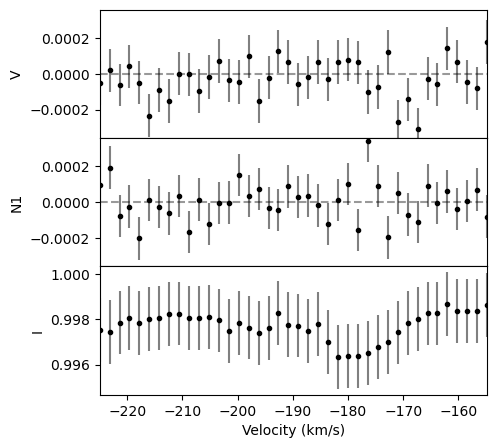

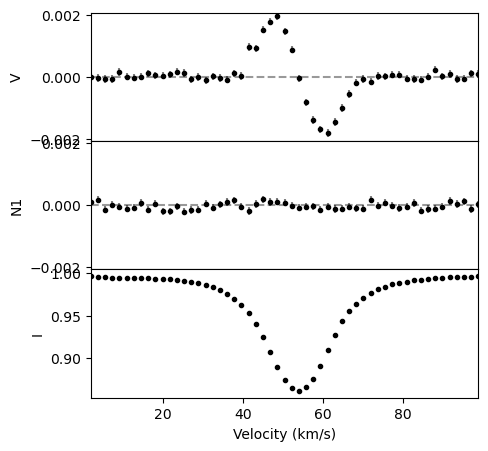

In [6]:
# slicing lsd data takes the same form as slicing typical numpy arrays
lsdslice = lsd1[10:50]
fig, ax = lsdslice.plot(figsize=(5,5))

# this will create an lsd profile with all data points where vel>0 and vel<100
lsdpos = lsd1[lsd1.vel>0]
lsdpos = lsdpos[lsdpos.vel<100]
fig, ax = lsdpos.plot(figsize=(5,5))

# you can also return the length of the LSD profile using
print(lsdpos.npix)
# or
print(len(lsdpos))

## 3. Normalization, weights, and velocity shifts
We can normalize a LSD profile to a different continuum. From this, the Stokes parameters and the error bars are recomputed accordingly. Two methods for adjusting the LSD weights are shown below; one uses old and new wint (intensity weight) and wpol (polarization weight) values (this uses the `set_weights` function) and the other uses a scale facor, `scale`. Finally, to apply a radial velocity shift to the LSD profile, you will use `vshift` and the value in km/s you want to shift the profile by.

(<Figure size 500x500 with 3 Axes>,
 array([<AxesSubplot:ylabel='V'>, <AxesSubplot:ylabel='N1'>,
        <AxesSubplot:xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

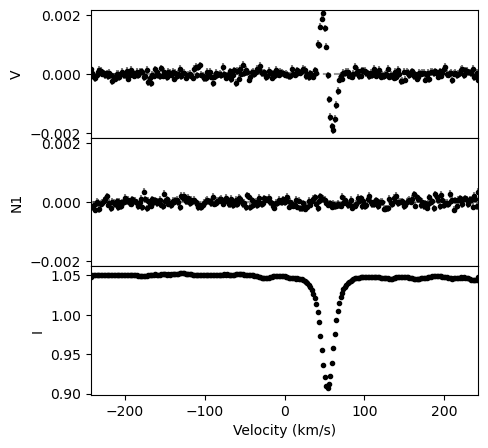

In [7]:
# renormalizing the lsd profile and plotting the new results
lsdnorm = lsd1.norm(0.95)

lsdnorm.plot(figsize=(5,5))

(<Figure size 500x500 with 3 Axes>,
 array([<AxesSubplot:ylabel='V'>, <AxesSubplot:ylabel='N1'>,
        <AxesSubplot:xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

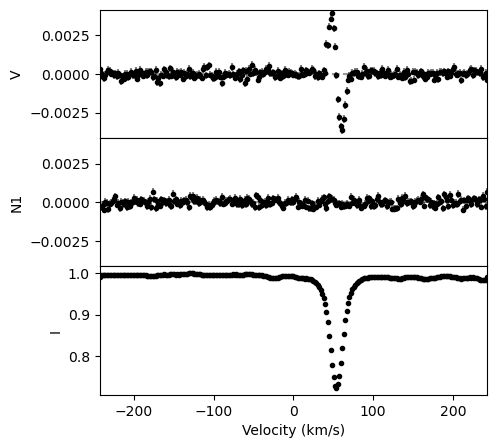

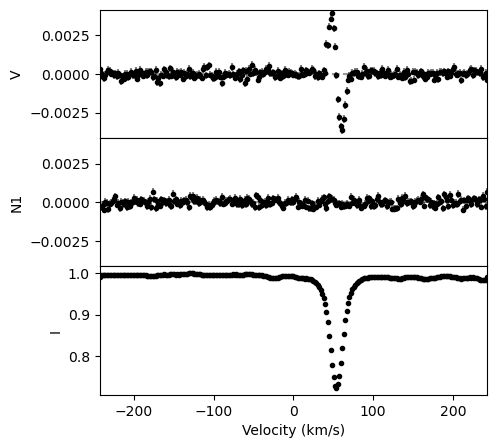

In [8]:
# We can also adjust the LSD weights two ways. 

# 1. if you want to adjust to a new wint and wpol from old ones:
wint_old = 0.1
wpol_old = 60 
wint_new = 0.2
wpol_new = 120

newlsd = lsd1.set_weights(wint_old, wpol_old, wint_new, wpol_new)
newlsd.plot(figsize=(5,5))

# 2. If you have already calculated the scale factors to go from old to new, you can simply do:
scale_int = 2.0
scale_pol = 2.0

newlsd = lsd1.scale(scale_int, scale_pol)
newlsd.plot(figsize=(5,5))

# (In fact, the set_weigths function just calls the scale function with new/old.)

(<Figure size 500x500 with 3 Axes>,
 array([<AxesSubplot:ylabel='V'>, <AxesSubplot:ylabel='N1'>,
        <AxesSubplot:xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

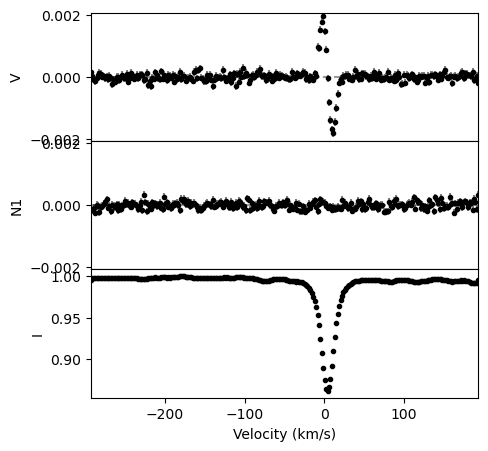

In [9]:
# Finally, you can apply a radial velocity shift to the LSD profile. 

lsd1.vshift(50.0).plot(figsize=(5,5))

# Note that in the above line, I did not save the shifted profile to a new variable
# lsd1.vshift() returns a LSD object, on which I called the plot function
# This whole command returns a figure that I could further manipulate with:
# ax, fig = lsd1.vshift(50.0).plot(figsize=(5,5))
# To save the shifted LSD profile, one could set it equal to a new variable such as:
# newlsd = lsd1.vshift(50.0)

## 4. Saving LSD profiles

We can save the LSD profiles by using the `save` class function

In [10]:
# lsd1.save('MyNewLSD.lsd')